In [1]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

D:\LLAS\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<h1>import Data</h1>

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/",one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


<h1>Set Hiper Piramiter</h1>

In [19]:
total_epoch = 200
batch_size = 50
learning_rate = 0.0001
n_hidden = 256
n_input = 28*28
n_noise = 128

<h1>Setting Input Tendor</h1>

In [4]:
#Real data
X = tf.placeholder(tf.float32,[None,n_input])
#Noise data
Z = tf.placeholder(tf.float32,[None,n_noise])
#Not used Y

<h1>Setting Tensor to Makes Hidden Layers</h1>

In [5]:
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden],stddev=0.1))
G_B1 = tf.Variable(tf.zeros([n_hidden]))

G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input],stddev=0.1))
G_B2 = tf.Variable(tf.zeros([n_input]))

<h1>Setting Tensor to Makes Discriminator Layers</h1>

In [6]:
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden],stddev=0.1))
D_B1 = tf.Variable(tf.zeros([n_hidden]))

D_W2 = tf.Variable(tf.random_normal([n_hidden, 1],stddev=0.1))
D_B2 = tf.Variable(tf.zeros([1]))

<h1>Create Generator</h1>

In [7]:
def generator(noise_z):
    hidden = tf.nn.relu( tf.matmul( noise_z, G_W1 ) + G_B1 )
    output = tf.nn.sigmoid( tf.matmul( hidden, G_W2 ) + G_B2 )
    return output

<h1>Create Discriminator</h1>

In [8]:
def discriminaster(inputs):
    hidden = tf.nn.relu( tf.matmul( inputs, D_W1 ) + D_B1 )
    output = tf.nn.sigmoid( tf.matmul( hidden, D_W2) + D_B2 )
    return output

<h1>Function to Make Noise-Data</h1>

In [9]:
def get_noise(batch_size, n_noise):
    return np.random.normal( size = ( batch_size, n_noise ) )

<h1>Maker Definition used Noise</h1>

In [10]:
G = generator(Z)
D_gene  = discriminaster(G)
D_real = discriminaster(X)

<h1>Definition to Loss functions</h1>

In [11]:
loss_D = tf.reduce_mean( tf.log( D_real ) + tf.log( 1 - D_gene ) )
loss_G = tf.reduce_mean( tf.log( D_gene ) )

<h1>Split G / D Variables</h1>

In [12]:
D_variable_list = [D_W1, D_B1, D_W2, D_B2]
G_variable_list = [G_W1, G_B1, G_W2, G_B2]

<h1>Optimizer Setting</h1>

In [13]:
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,var_list = D_variable_list)

train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,var_list = G_variable_list)

<h1>Setting etc....</h1>

In [14]:
total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D = 0
loss_val_G = 0

<h1>Make Tensor-Flow Session</h1>

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch :  0000 D loss : { -0.31693104 } G loss : { -2.3345542 }
Epoch :  0000 D loss : { -0.23396075 } G loss : { -2.3738325 }
Epoch :  0000 D loss : { -0.1969789 } G loss : { -2.406312 }
Epoch :  0000 D loss : { -0.23536567 } G loss : { -2.3010793 }
Epoch :  0000 D loss : { -0.22380994 } G loss : { -2.2253942 }
Epoch :  0000 D loss : { -0.2752008 } G loss : { -2.2628744 }
Epoch :  0000 D loss : { -0.26156685 } G loss : { -2.0975437 }
Epoch :  0000 D loss : { -0.22701897 } G loss : { -2.26929 }
Epoch :  0000 D loss : { -0.22854653 } G loss : { -2.2120695 }
Epoch :  0000 D loss : { -0.2237648 } G loss : { -2.2834046 }
Epoch :  0000 D loss : { -0.20118862 } G loss : { -2.3152761 }
Epoch :  0000 D loss : { -0.2095736 } G loss : { -2.336949 }
Epoch :  0000 D loss : { -0.26964954 } G loss : { -2.29556 }
Epoch :  0000 D loss : { -0.2653792 } G loss : { -2.0666451 }
Epoch :  0000 D loss : { -0.19420996 } G loss : { -2.3090255 }
Epoch :  0000 D loss : { -0.20482677 } G loss : { -2.2735276 }
Epo

KeyboardInterrupt: 

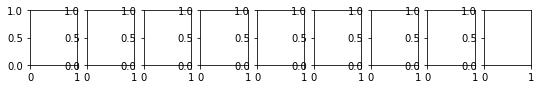

In [20]:
for epoch in range(total_epoch):
    for i in range(total_batch):
        
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        _, loss_val_D = sess.run( [ train_D, loss_D ], feed_dict = { X: batch_xs, Z: noise } )
        _, loss_val_G = sess.run( [ train_G, loss_G ], feed_dict = { Z: noise } )
        
        print('Epoch : ', '%04d' % epoch, 'D loss : {',loss_val_D,'}', 'G loss : {',loss_val_G,'}')
        
        if( epoch == 0 or ( epoch + 1 ) % 10 == 0 ):
            sample_size=10
            noise = get_noise(sample_size , n_noise)
            samples = sess.run(G,feed_dict={Z:noise})
            
            fig, ax = plt.subplots(1,sample_size,figsize=(sample_size,1))
            
            for i in range(sample_size):
                ax[i].set_axis_off()
                ax[i].imshow(np.reshape(samples[i],(28,28)))
                
            plt.savefig('sample{}.png'.format(str(epoch).zfill(3)),bbox_inches='tight')
            plt.close(fig)